# Activity 1.2 : Training Neural Networks


**NAME: MA. JENICA ROSE E. MOGATE**

**SECTION: CPE32S8**

#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns


In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:
filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
741,3,102,44,20,94,30.8,0.400,26,0
428,0,135,94,46,145,40.6,0.284,26,0
717,10,94,72,18,0,23.1,0.595,56,0
707,2,127,46,21,335,34.4,0.176,22,0
103,1,81,72,18,40,26.6,0.283,24,0


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model_1 = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 26ms/step - loss: 0.7961 - accuracy: 0.4549 - val_loss: 0.7949 - val_accuracy: 0.4479
Epoch 2/200
18/18 [==============================] - 0s 7ms/step - loss: 0.7638 - accuracy: 0.4826 - val_loss: 0.7673 - val_accuracy: 0.4948
Epoch 3/200
18/18 [==============================] - 0s 8ms/step - loss: 0.7366 - accuracy: 0.5017 - val_loss: 0.7436 - val_accuracy: 0.5260
Epoch 4/200
18/18 [==============================] - 0s 6ms/step - loss: 0.7130 - accuracy: 0.5312 - val_loss: 0.7232 - val_accuracy: 0.5312
Epoch 5/200
18/18 [==============================] - 0s 7ms/step - loss: 0.6929 - accuracy: 0.5556 - val_loss: 0.7055 - val_accuracy: 0.5521
Epoch 6/200
18/18 [==============================] - 0s 13ms/step - loss: 0.6751 - accuracy: 0.5903 - val_loss: 0.6897 - val_accuracy: 0.5677
Epoch 7/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6595 - accuracy: 0.6094 - val_loss: 0.6758 - val_accuracy: 0.5677
Epoch 8/200

In [ ]:
y_pred_class_nn_1 = (model_1.predict(X_test_norm))

6/6 [==============================] - 0s 2ms/step


In [ ]:
y_pred_prob_nn_1 = (model_1.predict(X_test_norm))

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0.4352558 ],
       [0.58007175],
       [0.36048824],
       [0.29185423],
       [0.17806976],
       [0.56857723],
       [0.04447858],
       [0.28456476],
       [0.9223908 ],
       [0.1720243 ]], dtype=float32)

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.4352558 ],
       [0.58007175],
       [0.36048824],
       [0.29185423],
       [0.17806976],
       [0.56857723],
       [0.04447858],
       [0.28456476],
       [0.9223908 ],
       [0.1720243 ]], dtype=float32)

Create the plot_roc function

In [ ]:
Rf = RandomForestClassifier(n_estimators=200)
Rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

Evaluate the model performance and plot the ROC CURVE

accuracy is 0.771
roc-auc is 0.836


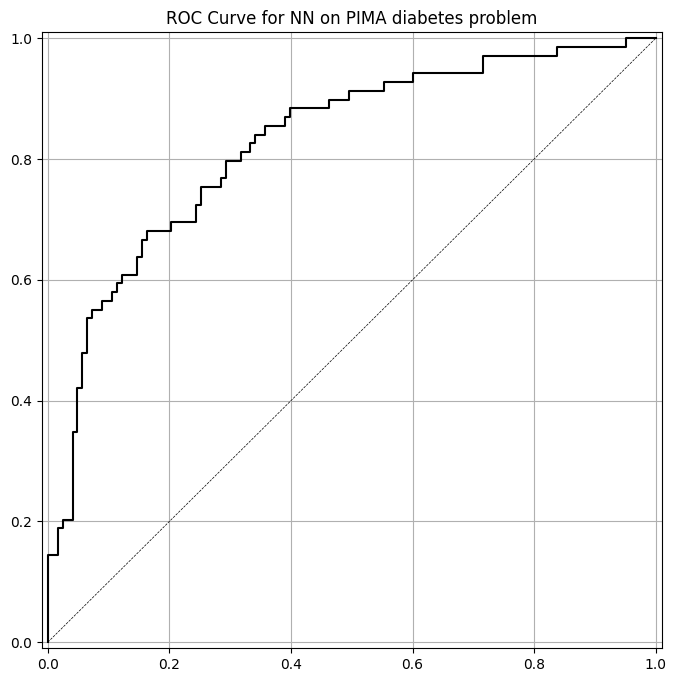

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,Rf.predict(X_test))))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,Rf.predict_proba(X_test)[:,1])))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

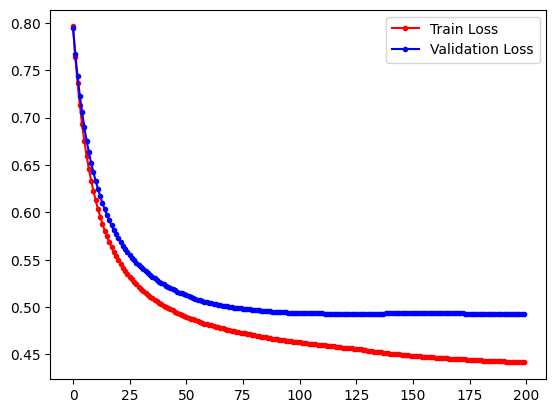

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

The data is underfitting because it fails to reach the train loss and match the graph line of the validation loss. It shows that the trainig data fails to predict the value of the validation.

#type your answer here

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

#### Conclusion

In [ ]:
#Build a model with two hidden layers, each with 6 nodes
#Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer

supple = Sequential([
    Dense(6, input_shape=(8,), activation="sigmoid"),
    Dense(2, activation="relu")
])

In [ ]:
#Use a learning rate of .003 and train for 1500 epochs
supple.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = supple.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 22ms/step - loss: 1.9328 - accuracy: 0.6823 - val_loss: 1.6825 - val_accuracy: 0.6979
Epoch 2/1500
18/18 [==============================] - 0s 6ms/step - loss: 1.1788 - accuracy: 0.6788 - val_loss: 1.1325 - val_accuracy: 0.6875
Epoch 3/1500
18/18 [==============================] - 0s 7ms/step - loss: 1.0401 - accuracy: 0.6788 - val_loss: 1.0491 - val_accuracy: 0.6927
Epoch 4/1500
18/18 [==============================] - 0s 7ms/step - loss: 0.9156 - accuracy: 0.6701 - val_loss: 0.9084 - val_accuracy: 0.6615
Epoch 5/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.8367 - accuracy: 0.6389 - val_loss: 0.8466 - val_accuracy: 0.6615
Epoch 6/1500
18/18 [==============================] - 0s 7ms/step - loss: 1.5291 - accuracy: 0.6875 - val_loss: 1.6613 - val_accuracy: 0.7031
Epoch 7/1500
18/18 [==============================] - 0s 9ms/step - loss: 1.4214 - accuracy: 0.7066 - val_loss: 1.2423 - val_accuracy: 0.6823
Epoch

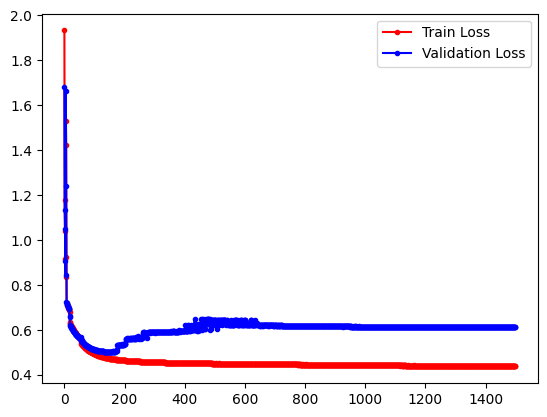

In [ ]:
#Graph the trajectory of the loss functions, accuracy on both train and test set

fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

This graph is optimal because the train data is too perfect for the dataset, However the validation loss shows a messy graph. This may be caused by the huge amount of epoch used in the diabetes data.

accuracy is 0.771
roc-auc is 0.836


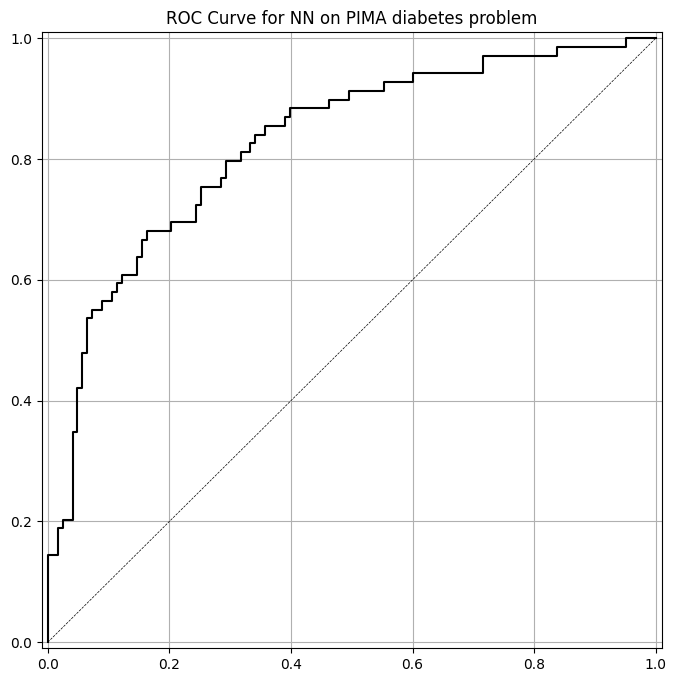

In [ ]:
#Plot the roc curve for the predictions

print('accuracy is {:.3f}'.format(accuracy_score(y_test,Rf.predict(X_test))))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,Rf.predict_proba(X_test)[:,1])))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

In [ ]:
#Use different learning rates, numbers of epochs, and network structures.

expe = Sequential([
    Dense(5, input_shape=(8,), activation="tanh"),
    Dense(10, activation="relu")
])

In [ ]:
#Use a learning rate of .003 and train for 1500 epochs
expe.compile(SGD(learning_rate = .001), "binary_crossentropy", metrics=["accuracy"])
run_hist_5 = expe.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Epoch 1/1000
18/18 [==============================] - 1s 16ms/step - loss: 3.1508 - accuracy: 0.1545 - val_loss: 3.1339 - val_accuracy: 0.2031
Epoch 2/1000
18/18 [==============================] - 0s 5ms/step - loss: 3.1107 - accuracy: 0.1528 - val_loss: 3.1183 - val_accuracy: 0.2031
Epoch 3/1000
18/18 [==============================] - 0s 5ms/step - loss: 3.0822 - accuracy: 0.1528 - val_loss: 3.0969 - val_accuracy: 0.2031
Epoch 4/1000
18/18 [==============================] - 0s 6ms/step - loss: 3.0623 - accuracy: 0.1545 - val_loss: 3.0927 - val_accuracy: 0.2031
Epoch 5/1000
18/18 [==============================] - 0s 5ms/step - loss: 3.0489 - accuracy: 0.1562 - val_loss: 3.0649 - val_accuracy: 0.2031
Epoch 6/1000
18/18 [==============================] - 0s 5ms/step - loss: 3.0322 - accuracy: 0.1545 - val_loss: 3.0602 - val_accuracy: 0.2031
Epoch 7/1000
18/18 [==============================] - 0s 5ms/step - loss: 3.0074 - accuracy: 0.1545 - val_loss: 3.0364 - val_accuracy: 0.2031
Epoch

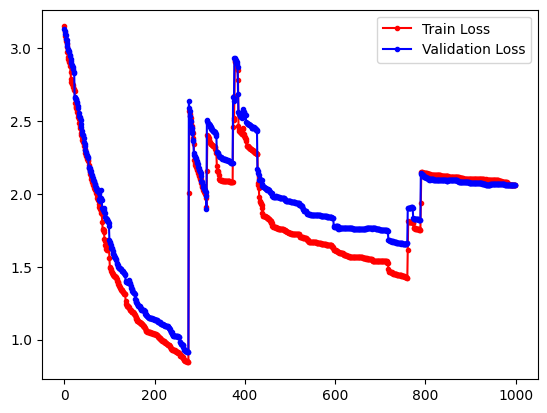

In [ ]:
#Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
#Graph the trajectory of the loss functions, accuracy on both train and test set

fig, ax = plt.subplots()
ax.plot(run_hist_5.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_5.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

The data above is not a good graph because none of the train loss and validation loss was trained well. The training data shows an underfit performance due to its gap from the validation data.

#CONCLUSION

During this activity, I was able to understand the difference between the hidden layers, its nodes and the structures. I was also able to identify the effect of epoch and learning rate to the data. The higher the epoch, the higher the chance for the data to be overfitting or to learn more from the model.